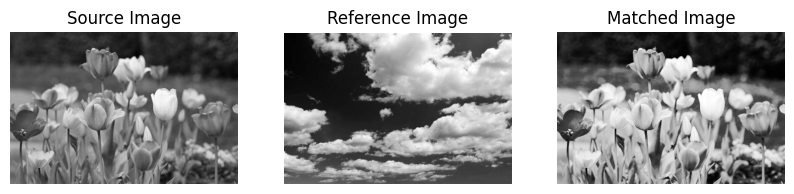

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

currenPaths = os.getcwd().split(os.sep)
currenPaths.pop()
img_path = os.path.join(os.sep.join(currenPaths), 'images/tulip.jpeg')
path2= os.path.join(os.sep.join(currenPaths), 'images/sky.jpeg')
img1 = cv2.imread(img_path,0)
img2 = cv2.imread(path2,0)



def calc_cdf(img):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    pdf = hist / hist.sum()
    cdf = pdf.cumsum()
    return cdf

def match_histogram(src,ref):
    src_cdf= calc_cdf(src)
    ref_cdf= calc_cdf(ref)

    lut = np.zeros(256, dtype=np.uint8)

    for src_pixel_val in range(256):
        diff = np.abs(ref_cdf - src_cdf[src_pixel_val])
        lut[src_pixel_val] = np.argmin(diff)
    
    matched_img = lut[src]
    return matched_img


matched_img = match_histogram(img1,img2)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("Source Image")
plt.imshow(img1,cmap='gray')
plt.axis("off")
plt.subplot(1,3,2)
plt.title("Reference Image")
plt.imshow(img2,cmap='gray')
plt.axis("off")
plt.subplot(1,3,3)
plt.title("Matched Image")
plt.imshow(matched_img,cmap='gray')
plt.axis("off")
plt.show()

